# EDA - Breast Cancer Wisconsin Dataset

## Índice
* [Introdução](#introducao)
* [Os dados](#dados)
* [Análise Exploratória](#analiseE)
* [Modelagem Preditiva](#modelagemP)
* [Resultados](#resultados)
* [Conclusão](#conclusao)


## Introdução <a name="introducao"></a>

A alguns anos atrás médicos e professores já possuíam técnicas e ferramentas que auxiliavam na identificação e diagnosticação do câncer de mama. Após o surgimento de machine learning na área da saúde, classificar se uma amostra de câncer de mama era benigna ou maligna se tornou uma das aplicações mais famosas de machine learning. Hoje em dia é possível ver diversos artigos científicos e paginas na internet explorando e se aprofundando nessa possibilidade.

Nesse notebook sera realizada uma análise exploratória dos dados referentes a amostras de exames de câncer de mama. Em seguida também sera construído alguns modelos preditivos que tem a finalidade de classificar se aquela amostra de câncer é benigna ou maligna a partir dos dados.

Os resultados a serem obtidos nesse notebook servem apenas para demonstrar algumas técnicas de ciência de dados e do que elas são capazes.

## Os dados <a name="dados"></a>

Os dados são disponibilizas por um grupo de pesquisadores da Universidade de Winsconsin, e são referentes a atributos calculados a partir de imagens digitalizadas de tecidos cancerígenos retirados com uma agulha especial. Além dos identificadores e do rótulo que indica se o câncer é maligno e benigno (B - benigno, M - maligno), existem mais 10 características nas quais se transformaram em 30 atributos numéricos. Onde para cada característica é dado a média, o erro padrão e a média dos três maiores valores; Totalizando 32 atributos distintos.

In [1]:
# Bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import seaborn as sns
from matplotlib import pyplot as plt

seed = 1999

In [2]:
nome_arquivo = "data.csv"

# Ler dados
data = pd.read_csv(nome_arquivo)

A seguir vamos observar informações como os tipos dos atributos, quantos registros tem e se caso existam valores nulos.

In [3]:
# Tipo dos atributos
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [4]:
# Quantidade de registros
data.count()

id                         569
diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
Unnamed:

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# Quantidade de registros nulos
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Os dados fornecidos parecem ter uma coluna que está vazia e possui o nome de "Unnamed: 32". Já que essa coluna não servirá para nada, será removida.

In [7]:
# Removendo coluna "Unnamed: 32"
data = data.drop("Unnamed: 32",1)

In [8]:
data.count().tail()

compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
dtype: int64

Apesar de possuir um atributo a mais, os outros atributos parecem ok, e os dados estão prontos para serem analisados.

## Análise Exploratória <a name="analiseE"></a>

Primeiro vamos ver qual é a porcentagem de registros de câncer malignos e benignos.

In [9]:
quant = pd.DataFrame(data["diagnosis"].value_counts())
porcent = pd.DataFrame(data["diagnosis"].value_counts(normalize = True)*100)

ben_vs_mal = pd.concat([quant, porcent], axis=1)
ben_vs_mal.columns = ["Quantidade", "Porcentagem%"]
ben_vs_mal.index = ["Benigno", "Maligno"]


ben_vs_mal

,Quantidade,Porcentagem%
Benigno,357,62.741652
Maligno,212,37.258348


Agora, vamos ver a correlação entre os atributoss utilizando um mapa de calor. Para isso é preciso transformar o rótulo em valores numéricos.

In [10]:
def categoriza(S):
    # Codifica o atributo "diagnosis"
    if S == 'M':
        return 0
    else:
        return 1

hm = data.copy()
hm = hm.drop("id",1)
hm["diagnosis"] = hm["diagnosis"].apply(categoriza)

<AxesSubplot:>

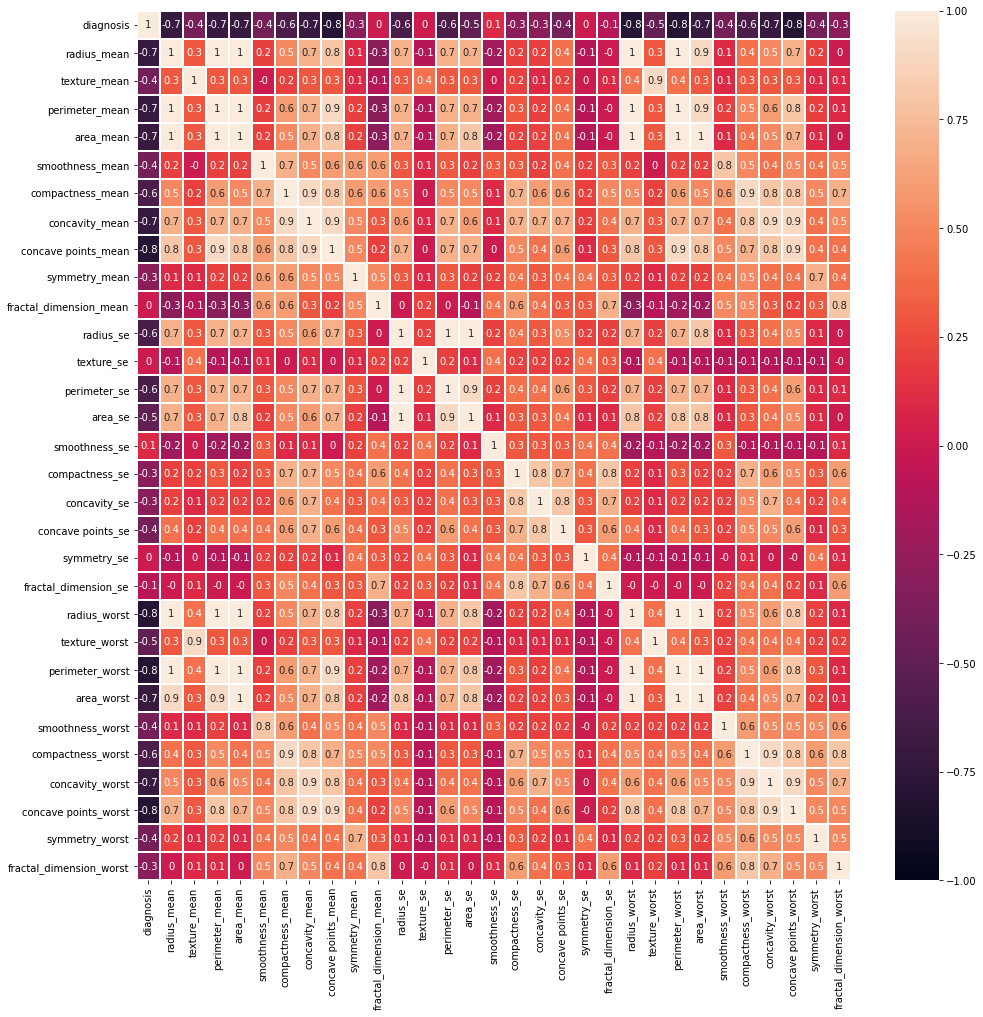

In [11]:
# Heatmap
plt.subplots(figsize=(16, 16))
sns.heatmap(hm.corr().round(1), linewidths=0.2, vmin=-1, vmax=1, annot = True)

Alguns atributos como o raio e o perímetro parecem ter uma forte ligação com o diagnóstico. Vamos criar um scatter plot do perimetro médio e do raio médio para observar a relação dos dois com o diagnostico.

<AxesSubplot:xlabel='radius_mean', ylabel='perimeter_mean'>

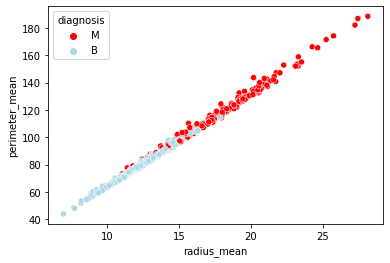

In [12]:
# Scatter plot radius_mean X perimeter_mean
sns.scatterplot(data = data, x = "radius_mean", y = "perimeter_mean", hue = "diagnosis", palette = ["red", "lightblue"])

Como podemos ver acima, parece que o tamanho afeta o diagnostico. Ou seja, quanto maior o raio ou o perimetro, maior a chance do câncer ser maligno.

Agora vamos aplicar a mesma visualização só que ao invés de utilizar os valores médios, vamos observar a relação dos valores maiores que são os que possuem "worst" depois do nome.

<AxesSubplot:xlabel='radius_worst', ylabel='perimeter_worst'>

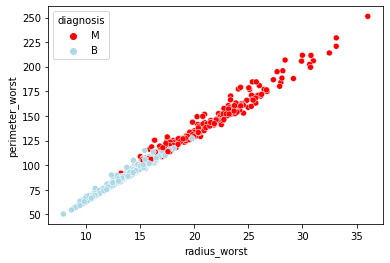

In [13]:
# Scatter plot radius_worst X perimeter_worst
sns.scatterplot(data = data, x = "radius_worst", y = "perimeter_worst", hue = "diagnosis", palette = ["red", "lightblue"])

Não parece que há uma diferença significante entre os dois.

Vamos utilizar outro método de visualização. E agora, vamos pegar o atributo "concave points_worst" e observa-lo a partir de um histograma.

<AxesSubplot:xlabel='concave points_worst', ylabel='Count'>

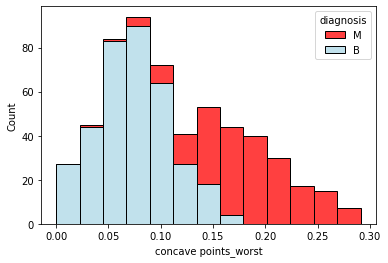

In [14]:
# Histograma concave points_worst
sns.histplot(data = data, x = "concave points_worst", hue = "diagnosis", multiple="stack", palette = ["red", "lightblue"])

## Modelagem Preditiva <a name="modelagemP"></a>

Nessa etapa serão testados alguns modelos de machine learning que possam trazer resultados bons. Entre os modelos estão:

* [Logistic regression](#logistic)

* [Decision trees](#tree)

* [Random forest](#rf)

* [SVM](#svm)

Mas antes de desenvolver os modelos, vamos primeiro retirar alguns atributos que não parecem apresentar valor para nós. Um exemplo seria o id que não passa de um atributo de identificação. Nesse caso, por o dataset ser bem pequeno, não é preciso fazer um "feature selection" para selecionar apenas os atributos mais representativos.

O atributo "diagnosis" precisa ser transformado para valores numéricos antes que seja alimentado ao modelo.

In [15]:
# Transforma "diagnosis" em valores numéricos
data["diagnosis"] = data["diagnosis"].apply(categoriza)

In [16]:
# Remove atributo ID
data = data.drop("id",1)

In [17]:
# Calcula a correlação de cada atributo
corr_diagnosis = data.corr().diagnosis
# Seleciona todos os atributos
all_cols = corr_diagnosis.keys()

data = data[all_cols.tolist()]
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Vamos separar os atributos do rótulo. Depois os dados serão normalizados por causa de performance. E por fim os dados ainda serão separados novamente, de maneira aleatória, entre dados de treino e teste, para que os modelos generalizem bem.

In [18]:
# Separa os dados entre atributo e rótulo
label = data["diagnosis"]
data = data.drop("diagnosis",1)

In [19]:
# Normaliza os dados entre 1 e -1
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(data)
data = scaler.transform(data)

In [20]:
# Separa os dados entre treino e teste
x_train, x_test, y_train,y_test = train_test_split(data, label, test_size = 0.25, random_state = seed)

### Logistic Regression <a name="logistic"></a>

Vamos ver como um modelo de regressão logistica se sai para esses dados.

In [21]:
# Treinamento do modelo de regressão logistica
LR_model = LogisticRegression(random_state = seed, max_iter = 100).fit(x_train, y_train)

In [22]:
# Teste do modelo com dados de teste
LR_predictions = LR_model.predict(x_test)

F1_score =  0.989
Precision =  0.978
Recall =  1.0
Accuracy =  0.986


(array([0.5, 1.5]),
 [Text(0, 0.5, 'Maligno_True'), Text(0, 1.5, 'Benigno_True')])

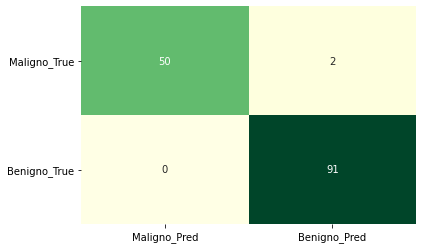

In [23]:
# Calcula metricas de teste
LR_f1 = f1_score(y_test, LR_predictions)
LR_precision = precision_score(y_test, LR_predictions)
LR_recall = recall_score(y_test, LR_predictions)
LR_acc = accuracy_score(y_test, LR_predictions)
LR_confusion_matrix = confusion_matrix(y_test, LR_predictions)

print("F1_score = ", round(LR_f1, 3))
print("Precision = ", round(LR_precision, 3))
print("Recall = ", round(LR_recall, 3))
print("Accuracy = ", round(LR_acc, 3))

sns.heatmap(LR_confusion_matrix, 
            xticklabels = ("Maligno_Pred","Benigno_Pred"), 
            yticklabels = ("Maligno_True", "Benigno_True"), 
            annot = True, cmap = "YlGn", cbar = False)
plt.yticks(rotation=0)

### Decision Tree <a name="tree"></a>

In [24]:
# Treinamento do modelo Decision Tree
Tree_model = tree.DecisionTreeClassifier(random_state=seed, max_depth = 4).fit(x_train, y_train)

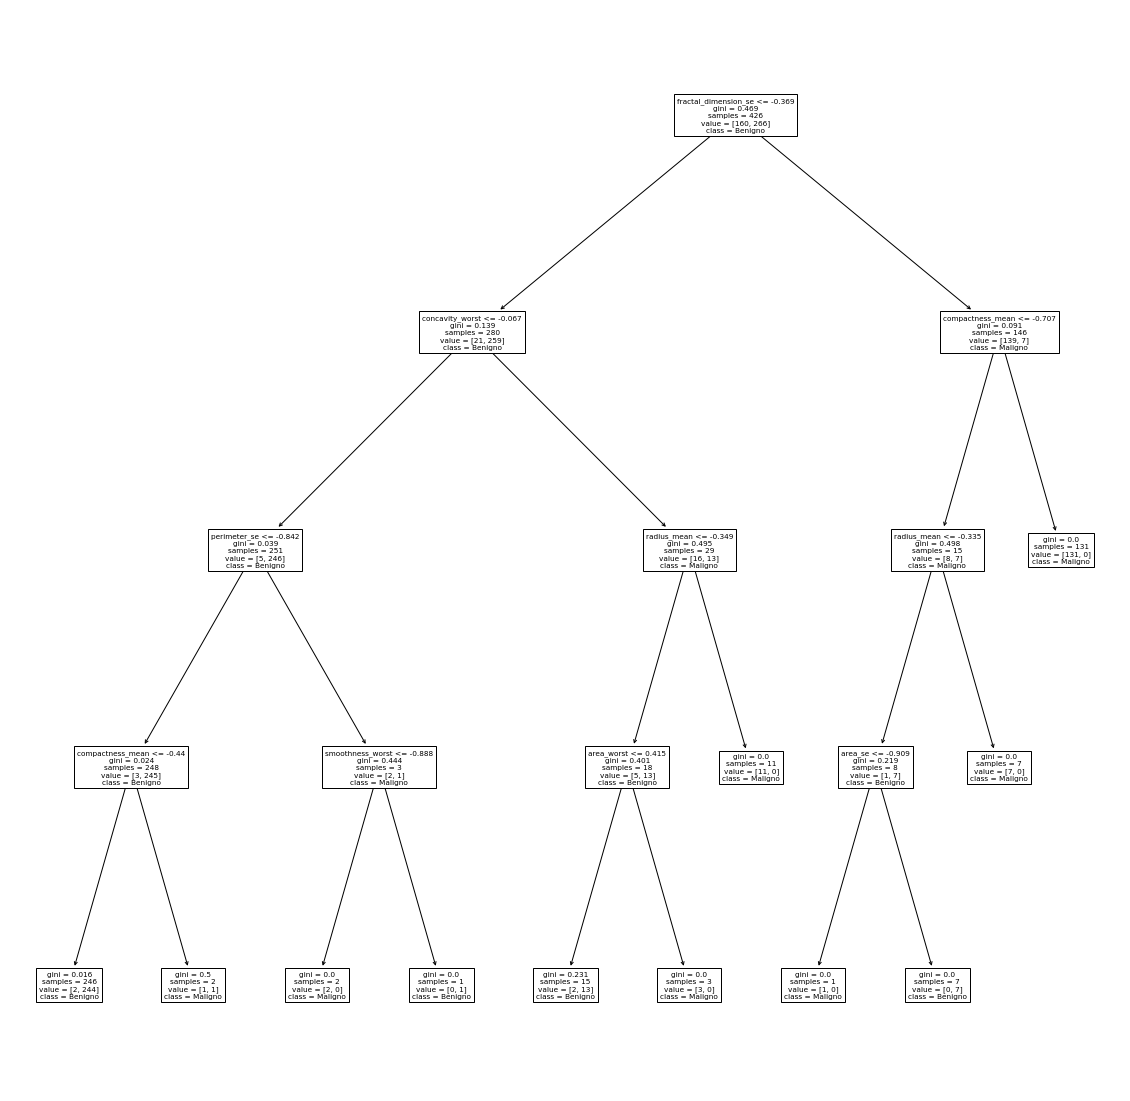

In [25]:
# Estrutura da arvore de decisão criada
plt.subplots(figsize=(20, 20))
treePlot = tree.plot_tree(Tree_model, class_names = ["Maligno", "Benigno"], feature_names = all_cols)

In [26]:
# Teste do modelo Decision Tree
Tree_predictions = Tree_model.predict(x_test)

F1_score =  0.937
Precision =  0.976
Recall =  0.901
Accuracy =  0.923


(array([0.5, 1.5]),
 [Text(0, 0.5, 'Maligno_True'), Text(0, 1.5, 'Benigno_True')])

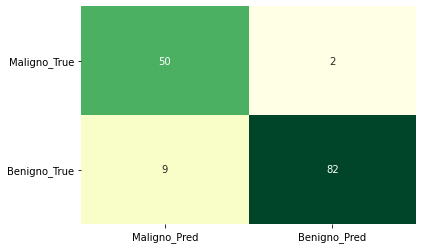

In [27]:
# Calcula metricas de teste
Tree_f1 = f1_score(y_test, Tree_predictions)
Tree_precision = precision_score(y_test, Tree_predictions)
Tree_recall = recall_score(y_test, Tree_predictions)
Tree_acc = accuracy_score(y_test, Tree_predictions)
Tree_confusion_matrix = confusion_matrix(y_test, Tree_predictions)

print("F1_score = ", round(Tree_f1, 3))
print("Precision = ", round(Tree_precision, 3))
print("Recall = ", round(Tree_recall, 3))
print("Accuracy = ", round(Tree_acc, 3))

sns.heatmap(Tree_confusion_matrix, 
            xticklabels = ("Maligno_Pred","Benigno_Pred"), 
            yticklabels = ("Maligno_True", "Benigno_True"), 
            annot = True, cmap = "YlGn", cbar = False)
plt.yticks(rotation=0)

### Random Forest <a name="rf"></a>

In [28]:
# Treinamento do modelo Random Forest
RF_model = RandomForestClassifier(random_state = seed, max_depth = 4, bootstrap = False).fit(x_train, y_train)

In [29]:
# Teste do modelo Decision Tree
RF_predictions = RF_model.predict(x_test)

F1_score =  0.944
Precision =  0.966
Recall =  0.923
Accuracy =  0.93


(array([0.5, 1.5]),
 [Text(0, 0.5, 'Maligno_True'), Text(0, 1.5, 'Benigno_True')])

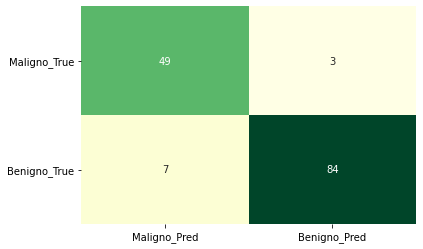

In [30]:
# Calcula metricas de teste
RF_f1 = f1_score(y_test, RF_predictions)
RF_precision = precision_score(y_test, RF_predictions)
RF_recall = recall_score(y_test, RF_predictions)
RF_acc = accuracy_score(y_test, RF_predictions)
RF_confusion_matrix = confusion_matrix(y_test, RF_predictions)

print("F1_score = ", round(RF_f1, 3))
print("Precision = ", round(RF_precision, 3))
print("Recall = ", round(RF_recall, 3))
print("Accuracy = ", round(RF_acc, 3))

sns.heatmap(RF_confusion_matrix, 
            xticklabels = ("Maligno_Pred","Benigno_Pred"), 
            yticklabels = ("Maligno_True", "Benigno_True"), 
            annot = True, cmap = "YlGn", cbar = False)
plt.yticks(rotation=0)

### SVM <a name="svm"></a>

In [31]:
# Treinamento do modelo SVM
SVM_model = SVC(gamma='auto', random_state = seed).fit(x_train, y_train)

In [32]:
# Teste do modelo SVM
SVM_predictions = SVM_model.predict(x_test)

F1_score =  0.995
Precision =  0.989
Recall =  1.0
Accuracy =  0.993


(array([0.5, 1.5]),
 [Text(0, 0.5, 'Maligno_True'), Text(0, 1.5, 'Benigno_True')])

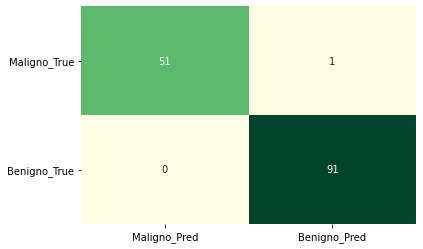

In [33]:
# Calcula metricas de teste
SVM_f1 = f1_score(y_test, SVM_predictions)
SVM_precision = precision_score(y_test, SVM_predictions)
SVM_recall = recall_score(y_test, SVM_predictions)
SVM_acc = accuracy_score(y_test, SVM_predictions)
SVM_confusion_matrix = confusion_matrix(y_test, SVM_predictions)

print("F1_score = ", round(SVM_f1, 3))
print("Precision = ", round(SVM_precision, 3))
print("Recall = ", round(SVM_recall, 3))
print("Accuracy = ", round(SVM_acc, 3))

sns.heatmap(SVM_confusion_matrix, 
            xticklabels = ("Maligno_Pred","Benigno_Pred"), 
            yticklabels = ("Maligno_True", "Benigno_True"), 
            annot = True, cmap = "YlGn", cbar = False)
plt.yticks(rotation=0)

## Resultados <a name="resultados"></a>

Considerando as métricas calculadas para cada modelo, especialmente o "F1_score", podemos ver que o modelo que se saiu melhor para os dados de teste foi o "SVM". Como podemos ver na matriz de confusão do modelo "SVM", apenas 1 caso é classificado errado, isso indica que o modelo se saiu muito bem em classificar se uma amostra de câncer é benigna ou maligna.

O modelo "SVM" não passou por uma etapa de "fine tuning", o que significa que ele tem o potencial de ficar ainda melhor, podendo chegar a até 100% de acuracia.

## Conclusão <a name="conclusao"></a>

Um dos objetivos desse notebook era demonstrar como analise exploratória e alguns modelos de machine learning podem solucionar problemas complexos. Com o resultado obtido, é possível dizer que o modelo construido consegue classificar com uma acuracia de 99.3% se uma amostra qualquer de câncer de mama é benigna ou maligna, ou seja, todos os objetivos foram alcançados.